In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
import pyannote.core
import numpy as np
from pyannote.core import Annotation
from pyannote.core import Segment
import xarray as xr
import wave 
import contextlib

# Path to file 

def getPathToGroundtruth(episode):
    """Return path to groundtruth file for episode"""
    pathToGroundtruth = "../../../tbbt/TBBT/season01/tbbt_season01_annotations/" \
                        + "TheBigBangTheory.Season01.Episode%02d.speakername.ctm" % episode
    return pathToGroundtruth

def getPathToAudioFile(episode):
    """Return path to groundtruth file for episode"""
    pathToAudioFile = "../../../tbbt/TBBT/season01/Audio/" \
                        + "TheBigBangTheory.Season01.Episode%02d.en.wav" % episode
    return pathToAudioFile


def getDurationAudioFile(episode):
    pathToAudioFile = getPathToAudioFile(episode)
    with contextlib.closing(wave.open(pathToAudioFile,'r')) as f:
        frames = f.getnframes()
        print(frames)
        rate   = f.getframerate()
        print(rate)
        duration=frames/float(rate)
        print("dur",duration)
    return duration
#getPathToGroundtruth(0)

def H_matrix(episode,framesize):
    pathToGroundtruth=getPathToGroundtruth(episode)
    pathToAudioFile = getPathToAudioFile(episode)
    duration = getDurationAudioFile(episode) 
    previous_index =[]
    next_index     =[]
    with open(pathToGroundtruth, 'r') as fp:
        speaker_duration = Annotation()
        who_speaks_when = Annotation()
        st_list        =[]
        en_list        =[]
        s_list         =[]
        ty_list        =[]

        for line in fp:
            columns = line.strip().split()
            start = float(columns[2])
            end = start + float(columns[3])
            speaker_name = columns[7]
            ntype = columns[-1]
            who_speaks_when[Segment(start,end)]= speaker_name
            st_list.append(start)
            en_list.append(end)
            s_list.append(speaker_name)
            ty_list.append(ntype)
    names = sorted(who_speaks_when.labels())
    names.append("zzilence")

    # Starting time = 0
    s= 0
    
    # Ending time t = dur
    t = duration-0
    print("t",t)
    # Total N gives the total no of frames.
    k=t/framesize 
    N=int(np.ceil(k))
    #print(N)
    frame_start =np.arange(s,(N*framesize),framesize)
    frame_end = np.arange(s+framesize,(N*framesize)+framesize,framesize )
    frame = np.arange(0,len(frame_start),1)
    #i=np.arange(0,1,len(frame_start))
    
    K= len(names)                    
    speaker2index = {name: i for i, name in enumerate(names)}                   # Speaker index 
    frame2index = {frame_start: i for i,frame_start  in enumerate(frame_start)} # Frame index
    #print(speaker2index)
    matrix = np.zeros((K,len(frame_start)))										# Create zero matrix 

    # ratio of time duration per frame 
    for i,(m,n) in enumerate(zip(frame_start,frame_end)):					
        seg = Segment(m,n)
        
        #print("Segment No",i, "S:E", m , n)

        speaker_crop = who_speaks_when.crop(seg)
        
        #print("speakercrop", speaker_crop)
        frame_index= frame2index[m]
        
        noise_index = speaker2index['zzilence']
        
        r=0
        
        F = float("{0:.3f}".format(framesize))
        
        for segment,_,speaker in speaker_crop.itertracks(label=True):
        
            J = float("{0:.3f}".format(segment.duration))
            
            speaker_index = speaker2index[speaker]
            
            r += J
            
            
            #print("matrix",float("{0:.3f}".format(J/F)))
            matrix[speaker_index,frame_index]+= float("{0:.3f}".format(J/F))
            
            #dict1 ={speaker,segment.duration}

        # print() 
       
        S = float("{0:.3f}".format(r))
        N = float("{0:.3f}".format(F-S))
        #print("S",S)
        #print("F",F)
        #print("N = F-S = ",N)
        #print("Noise Index",float("{0:.3f}".format((F-S)/F)))
        matrix[noise_index,frame_index] += float("{0:.3f}".format((F-S)/F))

    return matrix
k = H_matrix(1,1.5)

21112831
16000
dur 1319.5519375
t 1319.5519375


In [13]:
def negative_check(k):
    for row  in k:
        for i in row:
            if (i<0):
                print(i)
negative_check(k)

-0.007
-0.007
-0.007
-0.013
-0.007


In [14]:
def print_columns(k):
    for i in  range (k.shape[1]):
        if (np.sum(k[:,i]))>1:
            print(i,np.sum(k[:,i]))
            print(k[:,i])
print_columns(k)

1 1.001
[ 0.     0.     0.     0.     0.     0.921  0.     0.     0.     0.08 ]
7 1.001
[ 0.     0.     0.     0.     0.     0.921  0.     0.     0.     0.08 ]
9 1.001
[ 0.     0.     0.354  0.     0.     0.     0.     0.     0.     0.647]
19 1.001
[ 0.     0.     0.561  0.     0.     0.     0.     0.     0.     0.44 ]
29 1.001
[ 0.     0.     0.554  0.     0.     0.     0.     0.     0.     0.447]
39 1.001
[ 0.     0.     0.     0.     0.     0.     0.881  0.     0.     0.12 ]
60 1.001
[ 0.     0.     0.     0.     0.     0.714  0.     0.     0.     0.287]
68 1.0
[ 0.     0.     0.893  0.     0.     0.     0.     0.     0.     0.107]
71 1.001
[ 0.     0.     0.     0.     0.     0.954  0.     0.     0.     0.047]
85 1.001
[ 0.     0.     0.     0.     0.     0.654  0.     0.     0.     0.347]
86 1.001
[ 0.     0.     0.854  0.     0.     0.     0.     0.     0.     0.147]
87 1.001
[ 0.     0.     0.874  0.     0.     0.     0.     0.     0.     0.127]
89 1.001
[ 0.     0.     0.     0

In [15]:
np.sum(k[:,646])

1.0

In [16]:
k.shape

(10, 880)

In [17]:
k[:,0]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.06,  0.  ,  0.  ,  0.  ,  0.94])

In [18]:
speaker2index

NameError: name 'speaker2index' is not defined

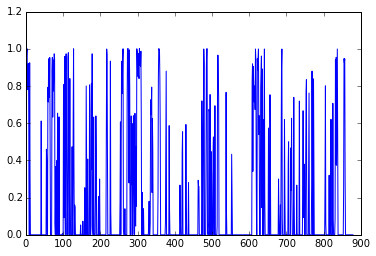

In [22]:
plot(k[5, :]) #sheldon

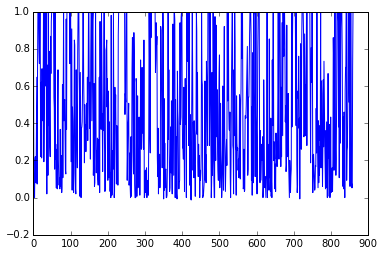

In [24]:
plot(k[9,:]) #silence in betweem the episodes

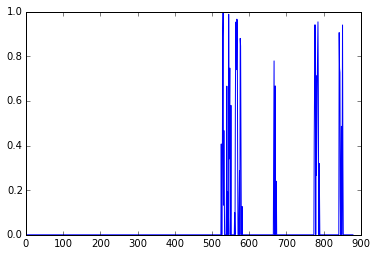

In [25]:
plot(k[0,:])